In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

Can change to CleanDatav2merge.csv. I wasn't sure on which one to use from just skimming the new Data Cleaning notebook. I plan on working more on this tomorrow afternoon.

## Import cleaned dataset and observe basic statistics

In [2]:
#Import cleaned data set, print shape and data types and basic stats
Cleaned_data = pd.read_csv("CleanDatav2.csv")
print(Cleaned_data.shape)
print(Cleaned_data.dtypes, '\n')
Cleaned_data.describe()

(722, 59)
Unnamed: 0          int64
Dalc                int64
Fedu                int64
Fjob               object
G1_math           float64
G1_port           float64
G2_math           float64
G2_port           float64
G3_math           float64
G3_port           float64
Medu                int64
Mjob               object
Pstatus            object
Walc                int64
absences_math     float64
absences_port     float64
activities         object
address            object
age                 int64
failures            int64
famrel              int64
famsize            object
famsup             object
freetime            int64
goout               int64
guardian           object
health              int64
higher             object
internet           object
math_only         float64
nursery            object
paid_math          object
paid_port          object
port_only         float64
reason             object
romantic           object
school             object
schoolsup          object
se

/Users/elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,Dalc,Fedu,G1_math,G1_port,G2_math,G2_port,G3_math,G3_port,Medu,...,guardian_num,schoolsup_num,famsup_num,activities_num,nursery_num,higher_num,internet_num,romantic_num,paid_port_num,paid_math_num
count,722.000000,722.000000,722.000000,75.000000,647.000000,75.000000,647.000000,75.000000,647.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,647.000000,75.000000
mean,360.500000,1.520776,2.286704,9.280000,11.409583,8.733333,11.579598,7.746667,11.918083,2.484765,...,0.409972,0.894737,0.397507,0.522161,0.207756,0.113573,0.232687,0.623269,0.939722,0.720000
std,208.567735,0.925961,1.090657,3.327039,2.742414,3.511885,2.912993,4.801726,3.228323,1.126119,...,0.647890,0.307105,0.489722,0.499855,0.405983,0.317512,0.422837,0.484903,0.238186,0.452022
min,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.250000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,360.500000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
75%,540.750000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
max,721.000000,5.000000,4.000000,17.000000,19.000000,18.000000,19.000000,18.000000,19.000000,4.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


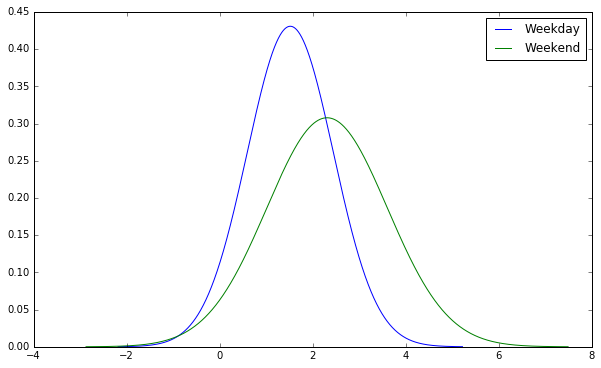

In [3]:
#cumulative distribution of weekday and weekend alcohol consumption from cleaned data set
mean_wd = Cleaned_data['Dalc'].mean()
mean_we = Cleaned_data['Walc'].mean()
std_wd = Cleaned_data['Dalc'].std()
std_we = Cleaned_data['Walc'].std()

x_wd = scipy.arange(mean_wd-4*std_wd,mean_wd+4*std_wd,0.001)
dist_wd = norm.pdf(x_wd, loc=mean_wd, scale=std_wd)
plt.plot(x_wd,dist_wd,label='Weekday')

x_we = scipy.arange(mean_we-4*std_we,mean_we+4*std_we,0.001)
dist_we = norm.pdf(x_we, loc=mean_we, scale=std_we)
plt.plot(x_we,dist_we,label='Weekend')

plt.legend(loc='best')
plt.show()

Weekday and weekend alcohol consumption don't appear to be very different from each other. Which might be expected as a person that drinks more on weekdays is also expected to drink more on weekends.

In [4]:
# Only use columns with numbers involved:
chosen_columns = ['Dalc', 'Fedu', 'G1_math', 'G1_port', 'G2_math','G2_port', 'G3_math', 
                  'G3_port', 'Medu', 'Walc','absences_math', 'absences_port', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math_only', 
                  'port_only', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_port_num', 'paid_math_num']
Cleaned_data = Cleaned_data[chosen_columns]

In [5]:
#cleaned data - only numbers
print(Cleaned_data.shape, '\n')
print(Cleaned_data.describe(), '\n')

(722, 40) 

             Dalc        Fedu    G1_math     G1_port    G2_math     G2_port  \
count  722.000000  722.000000  75.000000  647.000000  75.000000  647.000000   
mean     1.520776    2.286704   9.280000   11.409583   8.733333   11.579598   
std      0.925961    1.090657   3.327039    2.742414   3.511885    2.912993   
min      1.000000    0.000000   3.000000    0.000000   0.000000    0.000000   
25%      1.000000    1.000000        NaN         NaN        NaN         NaN   
50%      1.000000    2.000000        NaN         NaN        NaN         NaN   
75%      2.000000    3.000000        NaN         NaN        NaN         NaN   
max      5.000000    4.000000  17.000000   19.000000  18.000000   19.000000   

         G3_math     G3_port        Medu        Walc      ...        \
count  75.000000  647.000000  722.000000  722.000000      ...         
mean    7.746667   11.918083    2.484765    2.311634      ...         
std     4.801726    3.228323    1.126119    1.295935      ...  

/Users/elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Number counts for weekend alcohol consumption ratings:
1    270
2    162
3    138
4     99
5     53
Name: Walc, dtype: int64 

Number counts for weekday alcohol consumption ratings:
1    490
2    144
3     51
5     19
4     18
Name: Dalc, dtype: int64 



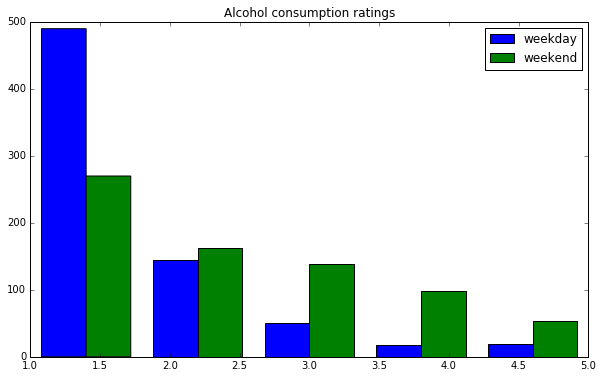

In [6]:
print('Number counts for weekend alcohol consumption ratings:')
print(Cleaned_data['Walc'].value_counts(), '\n')
print('Number counts for weekday alcohol consumption ratings:')
print(Cleaned_data['Dalc'].value_counts(), '\n')

data =[Cleaned_data["Dalc"], Cleaned_data["Walc"]]
n_bins = 5
plt.hist(data, n_bins, label=['weekday','weekend'],histtype='bar');
plt.title('Alcohol consumption ratings')
plt.legend(loc='upper right')
plt.show()

More of the students ranked their alcohol consumption higher on weekends than they did on weekdays. (53 compared to 19 for a rating of 5 or very high). Also, more of the students ranked their alcohol consumption lower on weekdays than they did on weekends. (490 compared to 270 for a rating of 1 or very low). Most students had lower alcohol consumption ratings.

                    Dalc      Fedu   G1_math   G1_port   G2_math   G2_port  \
Dalc            1.000000 -0.009340  0.022069 -0.197854  0.043208 -0.191678   
Fedu           -0.009340  1.000000  0.045351  0.214980 -0.016086  0.223639   
G1_math         0.022069  0.045351  1.000000       NaN  0.744365       NaN   
G1_port        -0.197854  0.214980       NaN  1.000000       NaN  0.864891   
G2_math         0.043208 -0.016086  0.744365       NaN  1.000000       NaN   
G2_port        -0.191678  0.223639       NaN  0.864891       NaN  1.000000   
G3_math         0.044854 -0.051878  0.676135       NaN  0.842983       NaN   
G3_port        -0.207317  0.209771       NaN  0.825750       NaN  0.918302   
Medu           -0.013662  0.643285  0.012725  0.263298  0.061516  0.264473   
Walc            0.618160  0.024033 -0.200603 -0.156903 -0.038364 -0.165870   
absences_math  -0.069244  0.106472  0.199011       NaN  0.245605       NaN   
absences_port   0.173590  0.031168       NaN -0.145995       NaN

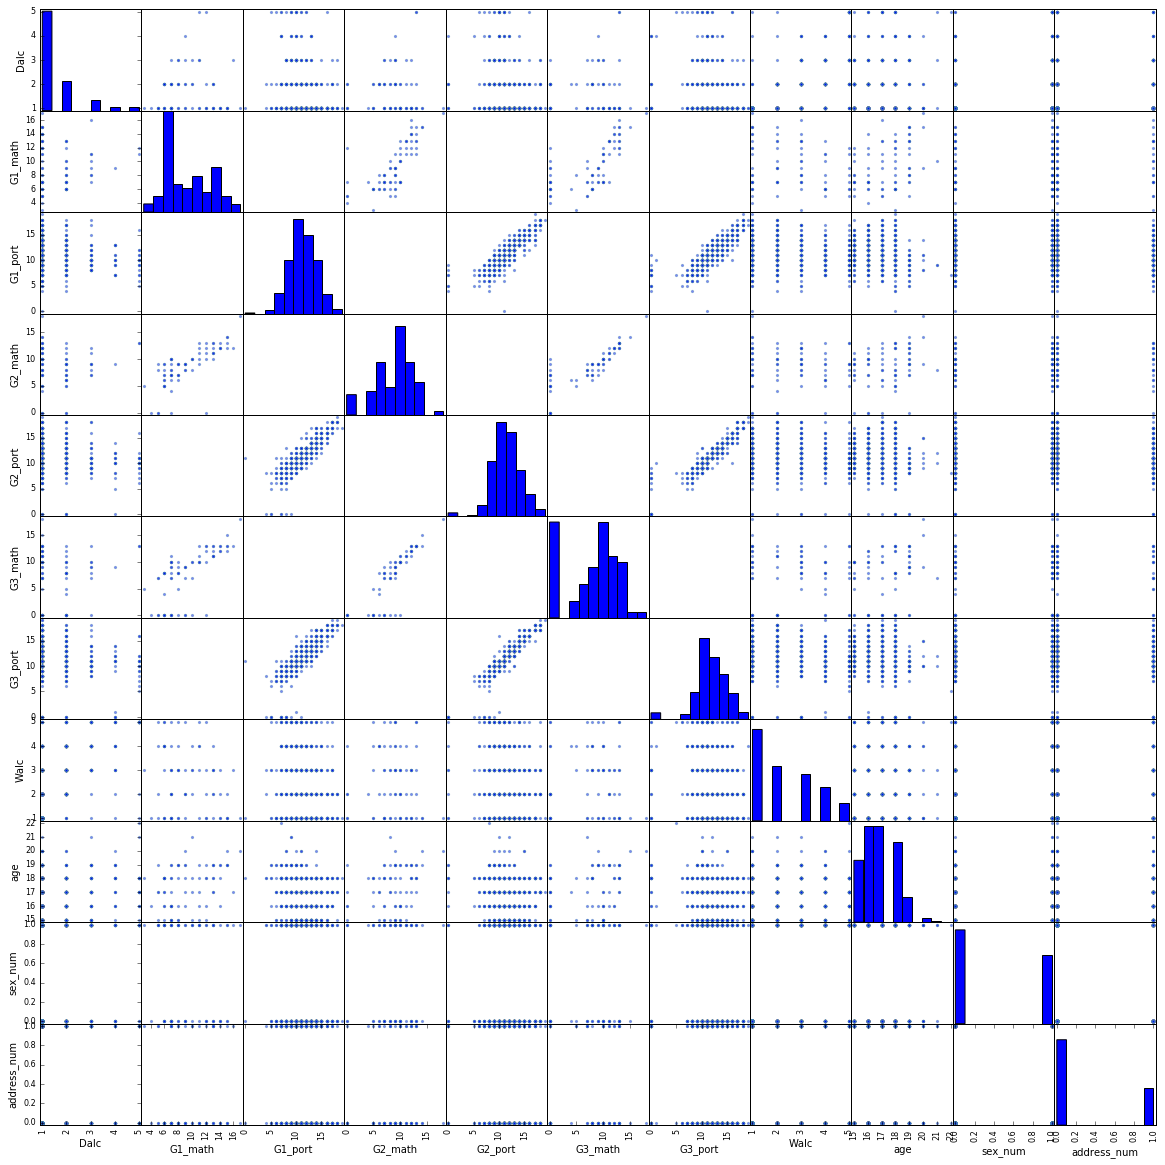

In [7]:
#looking for correlations
scatter_columns = ['Dalc', 'G1_math', 'G1_port', 'G2_math','G2_port', 'G3_math', 
                  'G3_port', 'Walc','age', 'sex_num','address_num']
print(Cleaned_data.corr())
pd.scatter_matrix(
    Cleaned_data[scatter_columns],
    figsize=(20, 20), diagonal='hist', color="#4682B4"); 

There appear to be no strong correlations between weekday or weekend alcohol consumption ratings with any other variables. The variables that do show stronger correlations with one another are the grades received. A different choice of variables might give different results. There is a correlation of about 62% between weekend and weekday alcohol consumption. This is expected to be high as explained before. There is also a relatively high correlation for both of these variables with a students ranking of how often they go out (~41%). This is also expected as going out more often tends to lead to drinking more often.

## Linear regression

In [8]:
#Some linear regression setup:
model = sm.ols(formula="Walc ~ Dalc + goout + sex_num", data=Cleaned_data)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Walc   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     217.8
Date:                Fri, 18 Nov 2016   Prob (F-statistic):          1.92e-100
Time:                        00:31:19   Log-Likelihood:                -977.54
No. Observations:                 722   AIC:                             1963.
Df Residuals:                     718   BIC:                             1981.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1148      0.108      1.064      0.2

This model should be played with more. The R-squared value is almost 50% with the variables we already expect to correlate to weekend alcohol consumption ratings. So this isn't a very predictive model per se. Perhaps including all of the variables would be good. But the grades have NaNs in them which the model doesn't like. 